In [1]:
%matplotlib inline
import sys 
sys.path.append('../../../')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import gpflow, gpitch
reload(gpitch)
from gpitch.amtgp import logistic
from scipy.fftpack import fft, ifft, ifftshift, fftshift
from scipy import signal
import soundfile

np.random.seed(29)
plt.rcParams['figure.figsize'] = (16, 4)  # set plot size

In [2]:
pitch_list = np.arange(80,81, 12)
str_list = [None]*pitch_list.size

for i in range(pitch_list.size):
    str_list[i] = str(pitch_list[i])
str_list = np.asarray(str_list)

data_loc = '../../../../datasets/maps/sample_rate_16khz/'
params_loc = '../../../../results/files/params_activations/'
inal_list, train_data, params = gpitch.amtgp.load_pitch_params_data(str_list, data_loc, params_loc)

32000


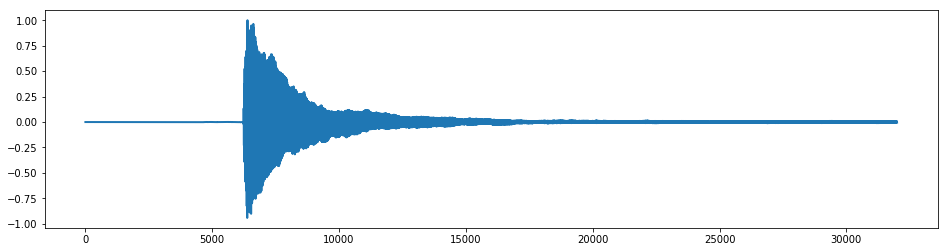

In [3]:
fs = 16e3
N = train_data[0].size
y = np.zeros((N,1))
x = np.linspace(0, (N-1)/fs, N).reshape(-1,1)
print N
for i in range(pitch_list.size):
    y += train_data[i]
    plt.figure()
    plt.plot(train_data[i], 'C0', lw=2 )

/home/pa/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


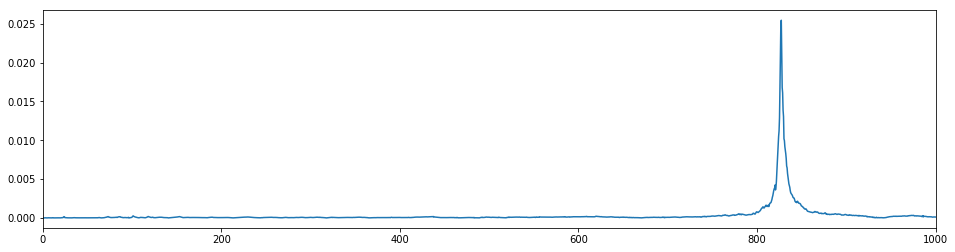

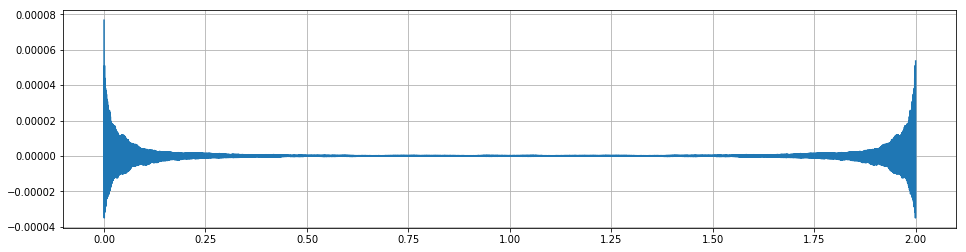

In [4]:
Y = fft(y.reshape(-1,))
S = 1./N*np.abs(Y)
k_data = ifft(S)
Ss = fftshift(S)

F = np.linspace(-fs/2, fs/2, N)
plt.figure()
plt.plot(F, Ss)
plt.xlim([0, 1000])

plt.figure()
plt.plot(x, k_data)
#plt.xlim([0.01, 0.015])
plt.grid()

In [5]:
#k_1 = ifftshift(ifft(S))
#plt.plot(x_plot, k_1)
#alpha =0.1
#plt.xlim([0.5, 0.5 + alpha])

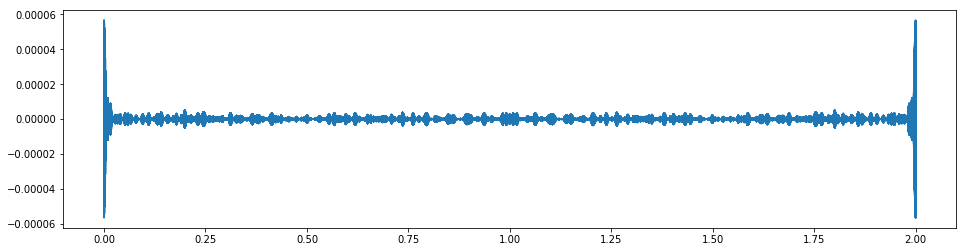

In [6]:
k_2 = np.zeros((N,1))

for i in range(160):
    k_2 += Ss[i]*np.cos(2*np.pi*F[i]*x)
    
plt.plot(x, k_2)

In [7]:

#plt.xlim([0, 0.1])

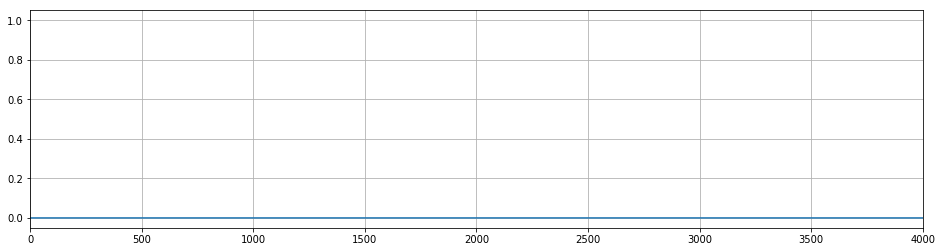

In [8]:
Y = fft(k_2.reshape(-1,))
S = np.abs(Y[0:N//2])
F = np.linspace(0, 16000./2, N//2)
x = np.linspace(0, (N-1)/(2.*fs), N/2).reshape(-1,1)
x_plot = x
plt.plot(F, S / np.max(S))
plt.xlim([0, 4000])
plt.grid()


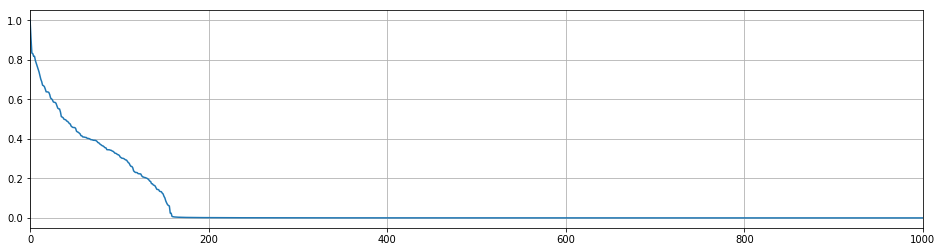

In [9]:
Ss = sorted(S, reverse=True)
plt.plot(Ss / np.max(Ss))
plt.xlim([0, 1000])
plt.grid(True)

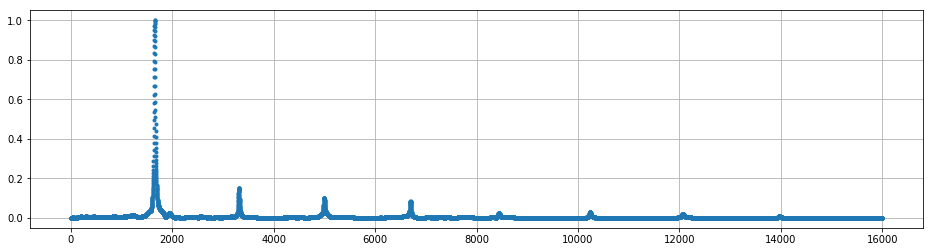

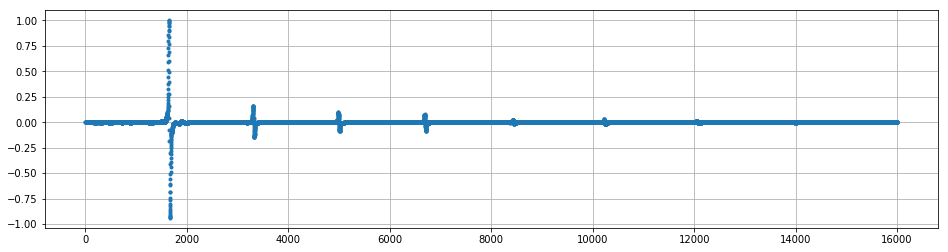

In [10]:
Y = fft(y.reshape(-1,))
S = 2./N*np.abs(Y[:N//2])

win_size = 50
win =  signal.hann(win_size)
Ss = signal.convolve(S, win, mode='same') / sum(win)

F = np.linspace(0, fs/2, N//2)

plt.figure()
plt.plot(Ss/np.max(Ss), '.')
#plt.xlim([0, 2000])
plt.grid(True)

dSs = np.gradient(Ss)

plt.figure()
plt.plot(dSs/np.max(np.abs(dSs)), '.')
#plt.xlim([4000, 6000])
plt.grid(True)

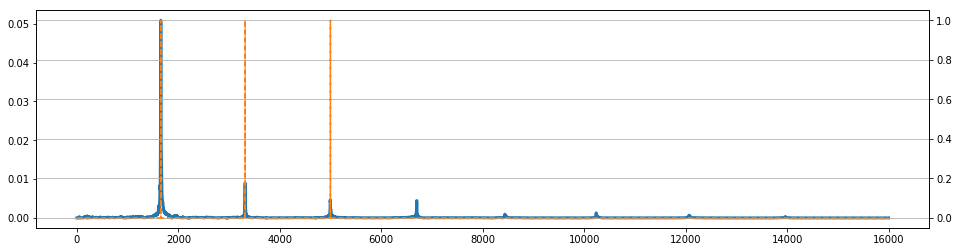

In [11]:
pick = np.zeros((dSs.size, 1))
for i in range(dSs.size - 1):
    if dSs[i] >= 0.:
        if dSs[i + 1] < 0. :
            if Ss[i]/np.max(Ss) >= 0.1:
                pick[i] = 1.
    

plt.plot(S, lw=3)
plt.twinx()
plt.plot(pick, '--C1')
#plt.xlim([0, 4000])
plt.grid(True)